In [3]:
# Library Imports (Consolidated and Organized)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from textblob import TextBlob
import warnings
from sklearn.feature_extraction.text import CountVectorizer
import textstat
import pickle
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uthka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\uthka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
data =pd.read_csv("Data/WELFake_Dataset.csv")
data.shape

(72134, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [7]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [8]:
data

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


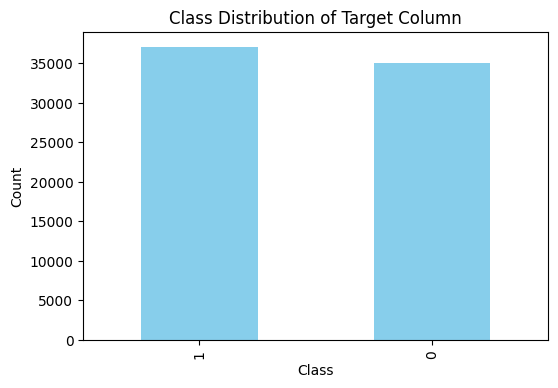

In [9]:
class_counts = data['label'].value_counts()
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Target Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [10]:
data = data.dropna()

print(f"number of missing values in label column: {data['label'].isna().sum()}")
print(f"number of missing values in text column: {data['text'].isna().sum()}")
print(f"number of missing values in title column: {data['text'].isna().sum()}")

number of missing values in label column: 0
number of missing values in text column: 0
number of missing values in title column: 0


In [11]:
# Filtering the dataset
filtered_data_real = data[data['label'] == 1]
filtered_data_fake = data[data['label'] == 0]

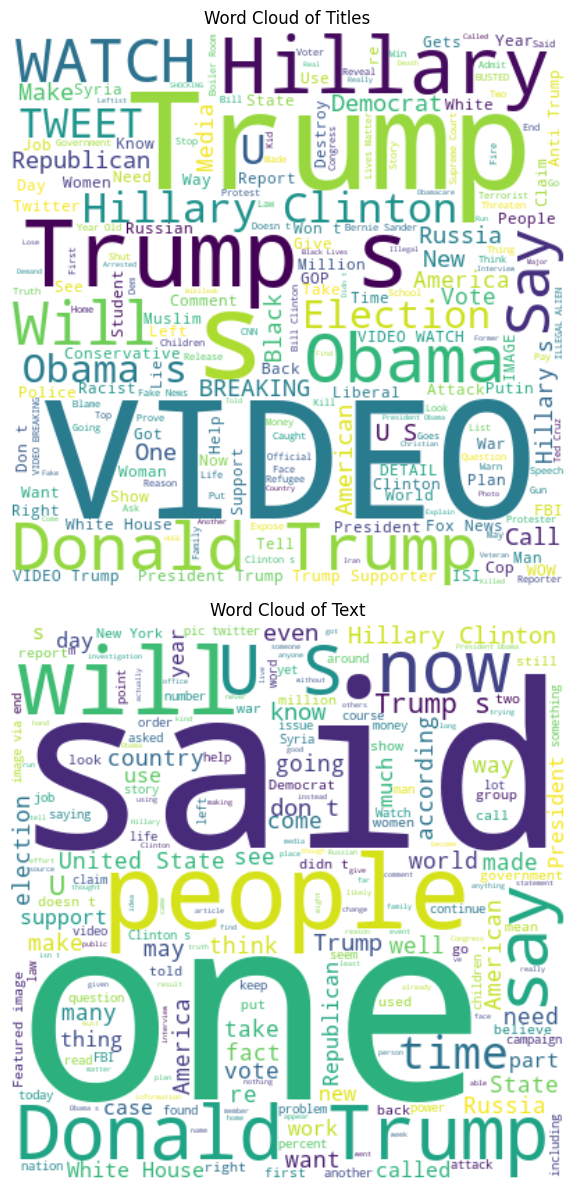

In [12]:
# Concatenate all the text from the 'title' and 'text' columns in the filtered dataset
text_title = ' '.join(filtered_data_real['title'].dropna())
text_text = ' '.join(filtered_data_real['text'].dropna())

# Generate the word clouds
wordcloud_title = WordCloud(width=400, height=400, background_color='white').generate(text_title)
wordcloud_text = WordCloud(width=400, height=400, background_color='white').generate(text_text)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

# Plot the first word cloud (title)
axes[0].imshow(wordcloud_title, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud of Titles')

# Plot the second word cloud (text)
axes[1].imshow(wordcloud_text, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud of Text')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

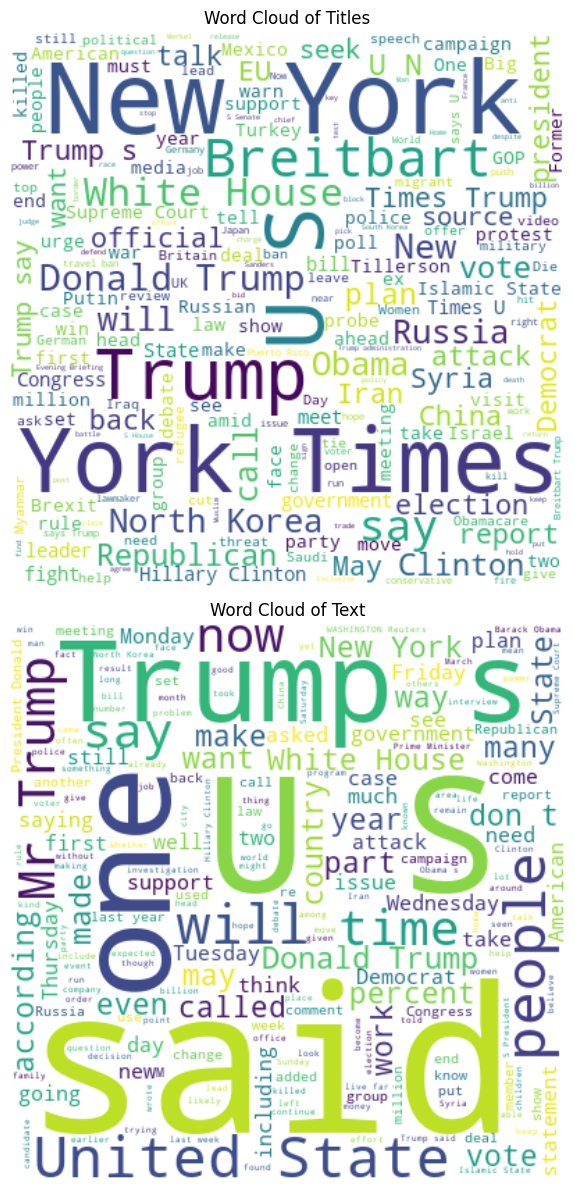

In [13]:
# Concatenate all the text from the 'title' and 'text' columns in the filtered dataset
text_title = ' '.join(filtered_data_fake['title'].dropna())
text_text = ' '.join(filtered_data_fake['text'].dropna())

# Generate the word clouds
wordcloud_title = WordCloud(width=400, height=400, background_color='white').generate(text_title)
wordcloud_text = WordCloud(width=400, height=400, background_color='white').generate(text_text)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

# Plot the first word cloud (title)
axes[0].imshow(wordcloud_title, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud of Titles')

# Plot the second word cloud (text)
axes[1].imshow(wordcloud_text, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud of Text')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

In [14]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocess the text data
def preprocess_text(text):
    # Remove punctuation, special characters, exclamation marks, and question marks
    text = re.sub(r'[^a-zA-Z0-9\s!?]', '', text)
    
    # Tokenization and removing stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the processed words back into a sentence
    return ' '.join(words)

# Apply preprocessing to the text columns
data['title'] = data['title'].fillna('').apply(preprocess_text)
data['text'] = data['text'].fillna('').apply(preprocess_text)

In [15]:
from textblob import TextBlob
import re

def extract_features(df):
    
    df['combined_text'] = df['title'] + " " + df['text']
    
    # Initialize columns for the features
    df['title_length'] = df['title'].str.len()  # Length of the title
    df['text_length'] = df['text'].str.len()    # Length of the text
    
    df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)  # Sentiment of the title
    df['text_sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)    # Sentiment of the text
    
    # Stylistic and formatting features
    df['title_exclamation_marks'] = df['title'].str.count(r'\!')  # Count of exclamation marks in title
    df['title_question_marks'] = df['title'].str.count(r'\?')     # Count of question marks in title
    df['title_all_caps'] = df['title'].str.count(r'\b[A-Z]{2,}\b')  # Count of all caps words in title
    df['title_repeated_letters'] = df['title'].apply(lambda x: len(re.findall(r'(.)\1{2,}', str(x))))  # Count of repeated letters in text
    
    df['text_exclamation_marks'] = df['text'].str.count(r'\!')  # Count of exclamation marks in text
    df['text_question_marks'] = df['text'].str.count(r'\?')     # Count of question marks in text
    df['text_all_caps'] = df['text'].str.count(r'\b[A-Z]{2,}\b')  # Count of all caps words in text
    df['text_repeated_letters'] = df['text'].apply(lambda x: len(re.findall(r'(.)\1{2,}', str(x))))  # Count of repeated letters in text

    # Vocabulary analysis
    df['title_unique_words'] = df['title'].apply(lambda x: len(set(str(x).split())))  # Number of unique words in title
    df['text_unique_words'] = df['text'].apply(lambda x: len(set(str(x).split())))    # Number of unique words in text
    
    # Readability Scores (using one of the readability measures for example)
    df['readability_score'] = df['text'].apply(lambda x: textstat.flesch_reading_ease(x))

    return df

# Extract features from the dataset
feature_data = extract_features(data)

# Display the first few rows with the new features
feature_data.head()

,title,text,label,combined_text,title_length,text_length,title_sentiment,text_sentiment,title_exclamation_marks,title_question_marks,title_all_caps,title_repeated_letters,text_exclamation_marks,text_question_marks,text_all_caps,text_repeated_letters,title_unique_words,text_unique_words,readability_score
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment expected Barack Obama Members FYF91...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,125,3341,0.080000,0.013967,0,0,6,0,2,7,1,2,17,313,-31.46
2,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...,Now demonstrator gathered last night exercisin...,1,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...,131,163,0.121875,0.178571,1,0,11,0,0,0,0,0,18,22,23.77
3,Bobby Jindal raised Hindu us story Christian c...,A dozen politically active pastor came private...,0,Bobby Jindal raised Hindu us story Christian c...,91,5663,0.000000,0.121225,0,0,0,0,0,1,6,1,13,548,-353.82
4,SATAN 2 Russia unvelis image terrifying new SU...,The RS28 Sarmat missile dubbed Satan 2 replace...,1,SATAN 2 Russia unvelis image terrifying new SU...,79,1445,-0.287879,0.066970,0,0,2,0,0,0,11,4,12,148,-157.25
5,About Time! Christian Group Sues Amazon SPLC D...,All say one time someone sued Southern Poverty...,1,About Time! Christian Group Sues Amazon SPLC D...,67,1123,-0.400000,-0.098030,1,0,1,0,1,0,12,0,9,111,-30.55


In [16]:
feature_data.describe()

,label,title_length,text_length,title_sentiment,text_sentiment,title_exclamation_marks,title_question_marks,title_all_caps,title_repeated_letters,text_exclamation_marks,text_question_marks,text_all_caps,text_repeated_letters,title_unique_words,text_unique_words,readability_score
count,71537.000000,71537.000000,71537.000000,71537.000000,71537.000000,71537.0000,71537.000000,71537.000000,71537.000000,71537.000000,71537.000000,71537.000000,71537.000000,71537.000000,71537.000000,71537.000000
mean,0.510351,69.493717,2332.106700,0.022141,0.052114,0.0631,0.051484,1.280330,0.010316,0.472091,0.973315,5.974237,0.487314,10.690747,220.843368,-150.975878
std,0.499896,24.841768,2586.280409,0.252674,0.108219,0.2763,0.231971,2.256425,0.103505,2.135718,2.950422,10.934578,1.464916,3.998471,194.398153,197.060106
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3027.000000
25%,0.000000,53.000000,1004.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,110.000000,-221.870000
50%,1.000000,65.000000,1736.000000,0.000000,0.048522,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,10.000000,177.000000,-103.800000
75%,1.000000,82.000000,2906.000000,0.100000,0.103250,0.0000,0.000000,1.000000,0.000000,0.000000,1.000000,7.000000,0.000000,13.000000,279.000000,-17.860000
max,1.000000,365.000000,87554.000000,1.000000,1.000000,9.0000,5.000000,24.000000,3.000000,213.000000,159.000000,604.000000,115.000000,45.000000,4298.000000,206.840000


In [17]:
# Vectorize the combined text data
tfidf = TfidfVectorizer(max_features=100)
X_text = tfidf.fit_transform(feature_data['combined_text'])

# Selecting the non-text features (excluding 'combined_text' which was used for TF-IDF)
non_text_features = feature_data.drop(columns=['title', 'text', 'combined_text', 'label'])

In [18]:
# Get the feature names (words)
feature_names = tfidf.get_feature_names_out()

word_tfidf_weights= []
for i in range(len(feature_data['combined_text'])):
    document_tfidf_values = X_text[i, :].toarray().flatten()
    word_tfidf_weights.append(document_tfidf_values)

In [19]:
# Combine text features with other features
X = pd.concat([pd.DataFrame(X_text.toarray()), non_text_features.reset_index(drop=True)], axis=1)
features=X.to_numpy()
y = feature_data['label']

In [20]:
features.shape,y.shape

((71537, 115), (71537,))

In [21]:
pickle.dump(feature_data, open('features.pkl', 'wb'))
pickle.dump(features, open('features_tfidf.pkl', 'wb'))
pickle.dump(y, open('labels.pkl', 'wb'))
pickle.dump(word_tfidf_weights, open('word_tfidf_weights.pkl', 'wb'))